In [ ]:
# Install PyTorch 
!pip install torch torchvision torchaudio

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch for Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Sklearn for preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [ ]:
# The final code and outputs are mentioned to the bottom of the file , i have began the process with testing various features and model and different rates 
# so just to my refernce im sticking  to the codes that i learn most and explored for my refernce. 

Instructions to Be Followed 

--> this project is built up on Google colab , with GPU's. I suggest to run on google colab . IF you want to run on any other Environments kindly follow below instructions :

--> Kindly Download datasets and then upload them to your content in colab then run them 
--> I have provided code for the upload also please feel free to use them

--> For downloading datasets link : https://github.com/AnneZhang13/INFO536/blob/main/project1/covid.test.csv

--> Save the code frequently to avoid the reconnecting issues from collab.

---> For fimal code and model drag to the bottom and verify from there i have kept a markdown like FINAL CODE , MODEL, VISUALIZATIONS 

--> The predictions are being saved as csv and can be downloaded to your folder for better understanding 



In [6]:
from google.colab import files
uploaded = files.upload()
# Load the training and testing datasets
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Display the first few rows of the training data
print("Training Data:")
train_data.head()

# Display the first few rows of the testing data
print("\nTesting Data:")
test_data.head()


Saving covid.test.csv to covid.test.csv
Saving covid.train.csv to covid.train.csv
Training Data:

Testing Data:


,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,...,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,felt_isolated.2,worried_become_ill.2,worried_finances.2
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,52.071090,8.624001,29.374792,5.391413,2.754804,19.695098,13.685645,24.747837,66.194950,44.873473
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.742461,21.720187,41.375784,9.450179,3.150088,22.075715,17.302077,23.559622,57.015009,38.372829
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.109045,20.123959,40.072556,8.781522,2.888209,23.920870,18.342506,24.993341,55.291498,38.907257
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.442267,16.083529,36.977612,5.199286,2.575347,21.073800,12.087171,18.608723,67.036197,43.142779
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.588783,19.503010,42.631236,11.549771,8.530551,15.896575,11.781634,15.065228,61.196518,43.574676


In [79]:
# Check the shape of the datasets
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Get an overview of the dataset
print("\nTraining Data Info:")
train_data.info()

print("\nTesting Data Info:")
test_data.info()

# Check for missing values in training data
print("\nMissing values in training data:")
print(train_data.isnull().sum())

# Check for missing values in testing data
print("\nMissing values in testing data:")
print(test_data.isnull().sum())

# Describe the data to understand the distribution of numerical features
print("\nTraining Data Description:")
print(train_data.describe())

print("\nTesting Data Description:")
print(test_data.describe())



Training data shape: (893, 94)
Testing data shape: (893, 95)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      893 non-null    int64  
 1   AL                      893 non-null    float64
 2   AK                      893 non-null    float64
 3   AZ                      893 non-null    float64
 4   AR                      893 non-null    float64
 5   CA                      893 non-null    float64
 6   CO                      893 non-null    float64
 7   CT                      893 non-null    float64
 8   FL                      893 non-null    float64
 9   GA                      893 non-null    float64
 10  ID                      893 non-null    float64
 11  IL                      893 non-null    float64
 12  IN                      893 non-null    float64
 13  IA           

In [ ]:
import pandas as pd


# Create the 'tested_positive.2' column in both DataFrames
train_data['tested_positive.2'] = train_data['tested_positive.1'].shift(periods=1, fill_value=0)
test_data['tested_positive.2'] = test_data['tested_positive.1'].shift(periods=1, fill_value=0)

# Now you can access the 'tested_positive.2' column in both DataFrames
train_labels = train_data['tested_positive.2'].values
test_labels = test_data['tested_positive.2'].values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Load the training and testing datasets
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Create the 'tested_positive.2' column if it doesn't exist
if 'tested_positive.2' not in train_data.columns:
    train_data['tested_positive.2'] = train_data['tested_positive.1'].shift(periods=1, fill_value=0)
if 'tested_positive.2' not in test_data.columns:
    test_data['tested_positive.2'] = test_data['tested_positive.1'].shift(periods=1, fill_value=0)

# Define the state columns (categorical)
state_columns = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IL',
                 'IN', 'IA', 'KS', 'KY', 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE',
                 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'TX',
                 'UT', 'VA', 'WA', 'WV', 'WI']

# List of all numerical features for Day 1 and Day 2
numerical_features_day1 = ['cli', 'ili', 'hh_cmnty_cli', 'nohh_cmnty_cli', 'wearing_mask',
                          'travel_outside_state', 'work_outside_home', 'shop', 'restaurant',
                          'spent_time', 'large_event', 'public_transit', 'anxious', 'depressed',
                          'felt_isolated', 'worried_become_ill', 'worried_finances', 'tested_positive']

numerical_features_day2 = [f"{feature}.1" for feature in numerical_features_day1]

# Combine all numerical features for Day 1 and Day 2
all_numerical_features = numerical_features_day1 + numerical_features_day2

# Target variable is 'tested_positive.2' (Day 3)
train_labels = train_data['tested_positive.2'].values
test_labels = test_data['tested_positive.2'].values

# Drop the 'id' column and Day 3 target column from training and testing datasets
train_data = train_data.drop(['id', 'tested_positive.2'], axis=1)
test_data = test_data.drop(['id', 'tested_positive.2'], axis=1)

# Data Preprocessing
# Feature Scaling: Normalize/Standardize numerical features for better performance
scaler = StandardScaler()

# Scale both training and testing data for numerical features
scaled_train_features = scaler.fit_transform(train_data[all_numerical_features])
scaled_test_features = scaler.transform(test_data[all_numerical_features])

# Combine scaled numerical features with state columns for the final input
train_input = np.concatenate([scaled_train_features, train_data[state_columns].values], axis=1)
test_input = np.concatenate([scaled_test_features, test_data[state_columns].values], axis=1)

# Display the preprocessed training data
print("\nPreprocessed Training Features (first 5 rows):")
print(train_input[:5])

print("\nTraining Labels (first 5 rows):")
print(train_labels[:5])




Preprocessed Training Features (first 5 rows):
[[-0.42115652 -0.57792261 -0.41724228 -0.36482217 -0.93653488  1.34218156
   0.97738322  1.73741526  1.25996746  1.26504599  1.40376495 -0.64290143
  -1.14773479 -0.63677075 -0.81766033 -1.79654966 -0.23549649  0.43025457
  -0.37038009 -0.4991468  -0.42397255 -0.36990761 -1.0682879   1.35933223
   1.01179571  1.79497961  1.24640322  1.23192261  1.31275981 -0.68805696
  -1.23249779 -0.62501025 -0.98874873 -1.84361141 -0.17557714  0.49633894
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.36312659 -0.4919582  -0.41392139 -0.36029813 -1.05539973

In [11]:
# this is my first version of code i tried with all features then relaized it couldnt help or be accurate so i removed the code for further use.
 # im just leaving it here for my refernce as how i started and learnt from it for further better version .



import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Load the training and testing datasets
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Create the 'tested_positive.2' column if it doesn't exist
if 'tested_positive.2' not in train_data.columns:
    train_data['tested_positive.2'] = train_data['tested_positive.1'].shift(periods=1, fill_value=0)
if 'tested_positive.2' not in test_data.columns:
    test_data['tested_positive.2'] = test_data['tested_positive.1'].shift(periods=1, fill_value=0)

# Define the state columns (categorical)
state_columns = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IL',
                 'IN', 'IA', 'KS', 'KY', 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE',
                 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'TX',
                 'UT', 'VA', 'WA', 'WV', 'WI']

# List of all numerical features for Day 1 and Day 2
numerical_features_day1 = ['cli', 'ili', 'hh_cmnty_cli', 'nohh_cmnty_cli', 'wearing_mask',
                          'travel_outside_state', 'work_outside_home', 'shop', 'restaurant',
                          'spent_time', 'large_event', 'public_transit', 'anxious', 'depressed',
                          'felt_isolated', 'worried_become_ill', 'worried_finances', 'tested_positive']

numerical_features_day2 = [f"{feature}.1" for feature in numerical_features_day1]

# Combine all numerical features for Day 1 and Day 2
all_numerical_features = numerical_features_day1 + numerical_features_day2

# Target variable is 'tested_positive.2' (Day 3)
train_labels = train_data['tested_positive.2'].values
test_labels = test_data['tested_positive.2'].values

# Drop the 'id' column and Day 3 target column from training and testing datasets
train_data = train_data.drop(['id', 'tested_positive.2'], axis=1)
test_data = test_data.drop(['id', 'tested_positive.2'], axis=1)

# Data Preprocessing
# Feature Scaling: Normalize/Standardize numerical features for better performance
scaler = StandardScaler()

# Scale both training and testing data for numerical features
scaled_train_features = scaler.fit_transform(train_data[all_numerical_features])
scaled_test_features = scaler.transform(test_data[all_numerical_features])

# Combine scaled numerical features with state columns for the final input
train_input = np.concatenate([scaled_train_features, train_data[state_columns].values], axis=1)
test_input = np.concatenate([scaled_test_features, test_data[state_columns].values], axis=1)

# Define the DNN model
class DNNModel(nn.Module):
    def __init__(self, input_dim):
        super(DNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize storage for validation losses
val_losses = []

# Cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(train_input)):
    X_train_fold, X_val_fold = train_input[train_index], train_input[val_index]
    y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_fold, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_fold, dtype=torch.float32).view(-1, 1)
    X_val_tensor = torch.tensor(X_val_fold, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_fold, dtype=torch.float32).view(-1, 1)

    # Prepare DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Initialize the model
    input_dim = X_train_fold.shape[1]
    model = DNNModel(input_dim)

    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop with early stopping
    num_epochs = 100
    patience = 10
    best_val_loss = np.inf
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        #  Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                val_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)

        print(f"Fold {fold+1} Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}")

        # implemented Early stopping check to avoid overfitting
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f"Early stopping triggered at fold {fold+1}, Epoch {epoch+1}.")
                break

    val_losses.append(best_val_loss)

# average cross-validated loss
print(f"Average Validation Loss across folds: {np.mean(val_losses)}")

# Evaluating on the testing data
with torch.no_grad():
    test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
    test_predictions = model(test_input_tensor)
    test_predictions = test_predictions.numpy().squeeze()

    # here im doing an  Calculation of  evaluation metrics
    mse = np.mean((test_predictions - test_labels) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(test_predictions - test_labels))

    print("Test MSE:", mse)
    print("Test RMSE:", rmse)
    print("Test MAE:", mae)

Fold 1 Epoch 1/100, Training Loss: 161.83826233358946, Validation Loss: 23.24341527153464
Fold 1 Epoch 2/100, Training Loss: 17.739493096576016, Validation Loss: 10.509455891216502
Fold 1 Epoch 3/100, Training Loss: 10.181916573468376, Validation Loss: 5.686033957144794
Fold 1 Epoch 4/100, Training Loss: 7.18725348220152, Validation Loss: 3.616539888522204
Fold 1 Epoch 5/100, Training Loss: 6.13032484405181, Validation Loss: 3.053291808156406
Fold 1 Epoch 6/100, Training Loss: 5.675549160031712, Validation Loss: 2.782597236773547
Fold 1 Epoch 7/100, Training Loss: 4.88861154458102, Validation Loss: 2.418460463776308
Fold 1 Epoch 8/100, Training Loss: 4.822717701687532, Validation Loss: 2.4166251789121067
Fold 1 Epoch 9/100, Training Loss: 4.70997270415811, Validation Loss: 2.39423000461915
Fold 1 Epoch 10/100, Training Loss: 4.695950041798985, Validation Loss: 1.9255331228761112
Fold 1 Epoch 11/100, Training Loss: 4.1987840883872085, Validation Loss: 1.9181180350920732
Fold 1 Epoch 12/

In [ ]:
# Initialize model, criterion, and optimizer with L2 regularization (weight decay)
model = SimpleDNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)  # L2 regularization

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# Function to train the model with scheduler
def train_model_with_scheduler(model, criterion, optimizer, scheduler, train_loader, epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Step the scheduler after each epoch
        scheduler.step(running_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Train the model with the new setup
train_model_with_scheduler(model, criterion, optimizer, scheduler, train_loader, epochs=200)

# Evaluate the model
mse = evaluate_model(model, test_loader)
print(f"Mean Squared Error with L2 Regularization and Scheduler: {mse:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/200], Loss: 0.1499
Epoch [2/200], Loss: 0.0935
Epoch [3/200], Loss: 0.0896
Epoch [4/200], Loss: 0.0884
Epoch [5/200], Loss: 0.0876
Epoch [6/200], Loss: 0.0862
Epoch [7/200], Loss: 0.0857
Epoch [8/200], Loss: 0.0860
Epoch [9/200], Loss: 0.0849
Epoch [10/200], Loss: 0.0848
Epoch [11/200], Loss: 0.0831
Epoch [12/200], Loss: 0.0818
Epoch [13/200], Loss: 0.0821
Epoch [14/200], Loss: 0.0823
Epoch [15/200], Loss: 0.0799
Epoch [16/200], Loss: 0.0811
Epoch [17/200], Loss: 0.0801
Epoch [18/200], Loss: 0.0781
Epoch [19/200], Loss: 0.0790
Epoch [20/200], Loss: 0.0781
Epoch [21/200], Loss: 0.0786
Epoch [22/200], Loss: 0.0786
Epoch [23/200], Loss: 0.0766
Epoch [24/200], Loss: 0.0757
Epoch [25/200], Loss: 0.0748
Epoch [26/200], Loss: 0.0749
Epoch [27/200], Loss: 0.0744
Epoch [28/200], Loss: 0.0743
Epoch [29/200], Loss: 0.0728
Epoch [30/200], Loss: 0.0719
Epoch [31/200], Loss: 0.0723
Epoch [32/200], Loss: 0.0711
Epoch [33/200], Loss: 0.0712
Epoch [34/200], Loss: 0.0710
Epoch [35/200], Loss: 0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the neural network model with additional layers and dropout
class EnhancedDNN(nn.Module):
    def __init__(self):
        super(EnhancedDNN, self).__init__()
        self.fc1 = nn.Linear(9, 128)  # Increased layer size
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.dropout = nn.Dropout(0.2)  # Dropout layer with 20% drop rate
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

# Function to train the model with early stopping
def train_model_with_early_stopping(model, criterion, optimizer, scheduler, train_loader, val_loader, epochs, patience):
    model.train()
    best_mse = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        running_loss = 0.0
        model.train()

        # Training phase
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation phase
        val_mse = evaluate_model(model, val_loader)
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation MSE: {val_mse:.4f}")

        # Scheduler step
        scheduler.step(val_mse)

        # Early stopping check
        if val_mse < best_mse:
            best_mse = val_mse
            patience_counter = 0
            best_model_state = model.state_dict()  # Save best model
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    model.load_state_dict(best_model_state)  # Load the best model state

# Function to evaluate the model
def evaluate_model(model, loader):
    model.eval()
    predictions, targets = [], []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            outputs = model(X_batch)
            predictions.extend(outputs.numpy())
            targets.extend(y_batch.numpy())
    mse = mean_squared_error(targets, predictions)
    return mse

# Create PyTorch DataLoader for training and validation
def create_data_loaders(X_train, y_train, X_val, y_val, batch_size=32):
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader

# Data Preparation: Simulate train/validation split
X_train = np.random.rand(1000, 9)
y_train = np.random.rand(1000, 1)
X_val = np.random.rand(200, 9)
y_val = np.random.rand(200, 1)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create data loaders
train_loader, val_loader = create_data_loaders(X_train, y_train, X_val, y_val)

# Initialize model, criterion, and optimizer with L2 regularization (weight decay)
model = EnhancedDNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)  # L2 regularization

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# Train the model with early stopping
train_model_with_early_stopping(model, criterion, optimizer, scheduler, train_loader, val_loader, epochs=300, patience=20)

# Evaluate the final model
final_mse = evaluate_model(model, val_loader)
print(f"Final Mean Squared Error with Enhanced Model and Early Stopping: {final_mse:.4f}")


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/300], Training Loss: 0.1220, Validation MSE: 0.1170
Epoch [2/300], Training Loss: 0.0933, Validation MSE: 0.1078
Epoch [3/300], Training Loss: 0.0933, Validation MSE: 0.1077
Epoch [4/300], Training Loss: 0.0843, Validation MSE: 0.1059
Epoch [5/300], Training Loss: 0.0861, Validation MSE: 0.1080
Epoch [6/300], Training Loss: 0.0838, Validation MSE: 0.1054
Epoch [7/300], Training Loss: 0.0822, Validation MSE: 0.1062
Epoch [8/300], Training Loss: 0.0800, Validation MSE: 0.1065
Epoch [9/300], Training Loss: 0.0789, Validation MSE: 0.1065
Epoch [10/300], Training Loss: 0.0738, Validation MSE: 0.1096
Epoch [11/300], Training Loss: 0.0737, Validation MSE: 0.1075
Epoch [12/300], Training Loss: 0.0751, Validation MSE: 0.1082
Epoch [13/300], Training Loss: 0.0749, Validation MSE: 0.1072
Epoch [14/300], Training Loss: 0.0710, Validation MSE: 0.1077
Epoch [15/300], Training Loss: 0.0696, Validation MSE: 0.1063
Epoch [16/300], Training Loss: 0.0697, Validation MSE: 0.1085
Epoch [17/300], T

In [30]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('covid.test.csv')

# Create a new column filled with zeros (or any desired default value)
df['tested_positive.2'] = 0

# Save the modified DataFrame to the same CSV file
df.to_csv('covid.test.csv', index=False)

In [36]:
# New Hyperparameters
learning_rate = 0.0005  # Try a smaller learning rate
batch_size = 64  # Increase batch size
epochs = 100  # Try increasing the number of epochs

# Build the DNN model with adjusted architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Larger layer size
    Dropout(0.4),  # Increased dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.3),  # Dropout layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 257.7709 - val_loss: 48.3176
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 54.1942 - val_loss: 21.2908
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 21.4742 - val_loss: 2.5238
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5785 - val_loss: 0.4228
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2481 - val_loss: 0.0493
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0590 - val_loss: 0.0683
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.8243 - val_loss: 0.0378
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.8391 - val_loss: 0.3229
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.8883 - val_loss: 0.1820
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.6916 - val_loss: 0.4516
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.7802 - val_loss: 0.0708
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17m

In [15]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('covid.test.csv')

# Create a new column filled with zeros (or any desired default value)
df['tested_positive.2'] = 0

# Save the modified DataFrame to the same CSV file
df.to_csv('covid.test.csv', index=False)

In [15]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Load data
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1', 'tested_positive.2']
target = 'tested_positive.2'

# Extract training features and target
x_train = train_data[features].values
y_train = train_data[target].values  # Use target column from train_data for training

# Extract features from test data for prediction
x_test = test_data[features].values

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Ensure target is 2D for regression
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Create dataset and dataloader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define your model architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 128)  # Adjust input size
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.output(x)
        return x

def train_model(model, train_loader, learning_rate, epochs=50):
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_rmse = float('inf')

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)

        # Validate the model (In this example, we are not using a validation set but we can include it similarly)
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in train_loader:  # Using train_loader here as a placeholder
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(train_loader.dataset)
        rmse = np.sqrt(val_loss)

        # Save the best model
        if rmse < best_rmse:
            best_rmse = rmse
            torch.save(model.state_dict(), f'best_model_lr_{learning_rate}.pt')

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val RMSE: {rmse:.4f}')

    print(f'Best RMSE for learning rate {learning_rate}: {best_rmse:.4f}')
    return best_rmse
# Create DataLoader for training data
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    model = MyModel()
    best_rmse = train_model(model, train_loader, lr)
    results[lr] = best_rmse

print('\nLearning rate experiment results:')
for lr, rmse in results.items():
    print(f'Learning Rate: {lr}, Best RMSE: {rmse:.4f}')




Training with learning rate: 0.1
Epoch [1/50], Train Loss: 37.3921, Val RMSE: 0.4406
Epoch [2/50], Train Loss: 0.0957, Val RMSE: 0.1923
Epoch [3/50], Train Loss: 0.0204, Val RMSE: 0.0954
Epoch [4/50], Train Loss: 0.0068, Val RMSE: 0.0774
Epoch [5/50], Train Loss: 0.0069, Val RMSE: 0.0564
Epoch [6/50], Train Loss: 0.0033, Val RMSE: 0.0378
Epoch [7/50], Train Loss: 0.0012, Val RMSE: 0.0315
Epoch [8/50], Train Loss: 0.0455, Val RMSE: 0.1879
Epoch [9/50], Train Loss: 0.0233, Val RMSE: 0.1511
Epoch [10/50], Train Loss: 4.7821, Val RMSE: 0.8537
Epoch [11/50], Train Loss: 0.1736, Val RMSE: 0.0635
Epoch [12/50], Train Loss: 0.0019, Val RMSE: 0.0415
Epoch [13/50], Train Loss: 0.0016, Val RMSE: 0.0344
Epoch [14/50], Train Loss: 0.0014, Val RMSE: 0.0318
Epoch [15/50], Train Loss: 0.0008, Val RMSE: 0.0287
Epoch [16/50], Train Loss: 0.0008, Val RMSE: 0.0261
Epoch [17/50], Train Loss: 0.0007, Val RMSE: 0.0254
Epoch [18/50], Train Loss: 0.0006, Val RMSE: 0.0262
Epoch [19/50], Train Loss: 0.0006, Val

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Create the optimizer
optimizer = Adam(learning_rate=0.01)  # Adjust learning rate as needed

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Summary of the model to verify setup
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Load data
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1', 'tested_positive.2']
target = 'tested_positive.2'

# Extract training features and target
x_train = train_data[features].values
y_train = train_data[target].values  # Use target column from train_data for training

# Extract features from test data for prediction
x_test = test_data[features].values

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Ensure target is 2D for regression
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Create dataset and dataloader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define your model architecture
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 128)  # Adjust input size
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.output(x)
        return x

def train_model(model, train_loader, learning_rate, epochs=50):
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_rmse = float('inf')

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)

        # Validate the model (In this example, we are not using a validation set but we can include it similarly)
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in train_loader:  # Using train_loader here as a placeholder
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(train_loader.dataset)
        rmse = np.sqrt(val_loss)

        # Save the best model
        if rmse < best_rmse:
            best_rmse = rmse
            torch.save(model.state_dict(), f'best_model_lr_{learning_rate}.pt')

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val RMSE: {rmse:.4f}')

    print(f'Best RMSE for learning rate {learning_rate}: {best_rmse:.4f}')
    return best_rmse
# Create DataLoader for training data
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Experiment with different learning rates
learning_rates = [ 0.003, 0.005]
results = {}

for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    model = MyModel()
    best_rmse = train_model(model, train_loader, lr)
    results[lr] = best_rmse

print('\nLearning rate experiment results:')
for lr, rmse in results.items():
    print(f'Learning Rate: {lr}, Best RMSE: {rmse:.4f}')




Training with learning rate: 0.003
Epoch [1/50], Train Loss: 65.6957, Val RMSE: 1.4593
Epoch [2/50], Train Loss: 0.4891, Val RMSE: 0.3583
Epoch [3/50], Train Loss: 0.0565, Val RMSE: 0.1497
Epoch [4/50], Train Loss: 0.0114, Val RMSE: 0.0939
Epoch [5/50], Train Loss: 0.0073, Val RMSE: 0.0740
Epoch [6/50], Train Loss: 0.0052, Val RMSE: 0.0641
Epoch [7/50], Train Loss: 0.0038, Val RMSE: 0.0552
Epoch [8/50], Train Loss: 0.0031, Val RMSE: 0.0515
Epoch [9/50], Train Loss: 0.0025, Val RMSE: 0.0463
Epoch [10/50], Train Loss: 0.0022, Val RMSE: 0.0482
Epoch [11/50], Train Loss: 0.0022, Val RMSE: 0.0428
Epoch [12/50], Train Loss: 0.0018, Val RMSE: 0.0409
Epoch [13/50], Train Loss: 0.0016, Val RMSE: 0.0466
Epoch [14/50], Train Loss: 0.0018, Val RMSE: 0.0499
Epoch [15/50], Train Loss: 0.0016, Val RMSE: 0.0360
Epoch [16/50], Train Loss: 0.0012, Val RMSE: 0.0338
Epoch [17/50], Train Loss: 0.0011, Val RMSE: 0.0323
Epoch [18/50], Train Loss: 0.0011, Val RMSE: 0.0359
Epoch [19/50], Train Loss: 0.0009, V

In [25]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# Load data
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1', 'tested_positive.2']
target = 'tested_positive.2'

# Extract training features and target
x_train = train_data[features].values
y_train = train_data[target].values

# Extract features from test data for prediction
x_test = test_data[features].values

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Split data into training and validation sets
dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define your model architecture with Dropout and L2 regularization
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)  # Dropout layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.layer3(x))
        x = self.output(x)
        return x

def train_model(model, train_loader, val_loader, learning_rate, epochs=50):
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

    best_rmse = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)

        # Validate the model
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_loader.dataset)
        rmse = np.sqrt(val_loss)

        # Scheduler step
        scheduler.step(val_loss)

        # Check for early stopping
        if rmse < best_rmse:
            best_rmse = rmse
            best_model_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= 10:  # Early stopping criterion
            print("Early stopping triggered")
            break

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val RMSE: {rmse:.4f}')

    if best_model_state is not None:
        torch.save(best_model_state, f'best_model_lr_{learning_rate}.pt')

    print(f'Best RMSE for learning rate {learning_rate}: {best_rmse:.4f}')
    return best_rmse

# Experiment with different learning rates
learning_rates = [0.002,0.003, 0.004, 0.005]
results = {}
# Load the best model and evaluate on the test set
best_lr = 0.003
model = MyModel()
model.load_state_dict(torch.load(f'best_model_lr_{best_lr}.pt'))

# Evaluate on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    # Assuming you need predictions for some post-processing
    test_predictions = test_outputs.numpy()
for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    model = MyModel()
    best_rmse = train_model(model, train_loader, val_loader, lr)
    results[lr] = best_rmse

print('\nLearning rate experiment results:')
for lr, rmse in results.items():
    print(f'Learning Rate: {lr}, Best RMSE: {rmse:.4f}')


<ipython-input-25-74b7596c4cdc>:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_model_lr_{best_lr}.pt'))



Training with learning rate: 0.002
Epoch [1/50], Train Loss: 119.1675, Val RMSE: 2.9474
Epoch [2/50], Train Loss: 17.2209, Val RMSE: 1.1106
Epoch [3/50], Train Loss: 13.0786, Val RMSE: 1.0947
Epoch [4/50], Train Loss: 12.2808, Val RMSE: 0.6553
Epoch [5/50], Train Loss: 10.9120, Val RMSE: 0.5001
Epoch [6/50], Train Loss: 10.8493, Val RMSE: 0.9220
Epoch [7/50], Train Loss: 9.8007, Val RMSE: 1.0850
Epoch [8/50], Train Loss: 9.5645, Val RMSE: 0.8783
Epoch [9/50], Train Loss: 9.5322, Val RMSE: 0.4559
Epoch [10/50], Train Loss: 9.1770, Val RMSE: 0.4940
Epoch [11/50], Train Loss: 9.0663, Val RMSE: 0.6700
Epoch [12/50], Train Loss: 8.5385, Val RMSE: 0.7357
Epoch [13/50], Train Loss: 7.3257, Val RMSE: 0.9851
Epoch [14/50], Train Loss: 7.3823, Val RMSE: 0.9825
Epoch [15/50], Train Loss: 7.1255, Val RMSE: 0.6825
Epoch [16/50], Train Loss: 6.9327, Val RMSE: 0.4883
Epoch [17/50], Train Loss: 6.2889, Val RMSE: 0.4260
Epoch [18/50], Train Loss: 6.7056, Val RMSE: 0.5032
Epoch [19/50], Train Loss: 6.0

In [27]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim

# Load data
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1', 'tested_positive.2']
target = 'tested_positive.2'

# Extract training features and target
x_train = train_data[features].values
y_train = train_data[target].values

# Extract features and target from test data
x_test = test_data[features].values
y_test = test_data[target].values  # Assuming you have the target for test data

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create dataset and dataloader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the final model with the best learning rate
class FinalModel(nn.Module):
    def __init__(self):
        super(FinalModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.output(x)
        return x

def train_final_model(model, train_loader, learning_rate, epochs=50):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_rmse = float('inf')

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_loader.dataset)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in train_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(train_loader.dataset)
        rmse = np.sqrt(val_loss)

        if rmse < best_rmse:
            best_rmse = rmse
            torch.save(model.state_dict(), 'final_best_model.pt')

        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val RMSE: {rmse:.4f}')

        # Early stopping condition
        if epoch > 5 and rmse >= best_rmse:
            print('Early stopping triggered')
            break

    print(f'Best RMSE for learning rate {learning_rate}: {best_rmse:.4f}')
    return best_rmse

# Instantiate and train the final model with learning rate 0.01
final_model = FinalModel()
best_rmse = train_final_model(final_model, train_loader, learning_rate=0.01)

# Evaluate the model on the test set
final_model.eval()
with torch.no_grad():
    test_outputs = final_model(x_test_tensor)
    test_predictions = test_outputs.numpy()

    # Compute test RMSE
    test_rmse = np.sqrt(np.mean((test_predictions - y_test_tensor.numpy())**2))
    print(f'Test RMSE: {test_rmse:.4f}')


Epoch [1/50], Train Loss: 33.1475, Val RMSE: 0.5102
Epoch [2/50], Train Loss: 0.0655, Val RMSE: 0.1210
Epoch [3/50], Train Loss: 0.0079, Val RMSE: 0.0542
Epoch [4/50], Train Loss: 0.0028, Val RMSE: 0.0435
Epoch [5/50], Train Loss: 0.0015, Val RMSE: 0.0344
Epoch [6/50], Train Loss: 0.0011, Val RMSE: 0.0329
Epoch [7/50], Train Loss: 0.0010, Val RMSE: 0.0270
Early stopping triggered
Best RMSE for learning rate 0.01: 0.0270
Test RMSE: 10.6325


In [19]:
# this code is not final one , one my expermental with different learning rates




import torch
import torch.nn as nn
import torch.optim as optim

class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        # Define the layers with a gradual decrease
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)

        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.dropout(x)
        x = self.relu(self.layer4(x))
        x = self.dropout(x)
        x = self.relu(self.layer5(x))
        x = self.output(x)
        return x

# Initialize the model
model = ImprovedModel()


import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error

# Assuming you have preprocessed data
# Prepare DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the criterion and optimizer
criterion = nn.MSELoss()  # Using Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=0.01)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    # Validation and early stopping can be added here

# Test evaluation
model.eval()
with torch.no_grad():
    test_predictions = model(x_test_tensor).numpy()
    test_rmse = np.sqrt(mean_squared_error(y_test_tensor.numpy(), test_predictions))
    print(f'Test RMSE: {test_rmse:.4f}')


Epoch [1/50], Loss: 160.5011
Epoch [2/50], Loss: 39.1479
Epoch [3/50], Loss: 28.3946
Epoch [4/50], Loss: 27.1154
Epoch [5/50], Loss: 26.4519
Epoch [6/50], Loss: 24.5200
Epoch [7/50], Loss: 21.1837
Epoch [8/50], Loss: 21.7633
Epoch [9/50], Loss: 22.4663
Epoch [10/50], Loss: 19.9019
Epoch [11/50], Loss: 19.5857
Epoch [12/50], Loss: 17.9830
Epoch [13/50], Loss: 17.9285
Epoch [14/50], Loss: 17.3205
Epoch [15/50], Loss: 18.4044
Epoch [16/50], Loss: 17.0283
Epoch [17/50], Loss: 14.4905
Epoch [18/50], Loss: 14.2275
Epoch [19/50], Loss: 14.8780
Epoch [20/50], Loss: 13.7493
Epoch [21/50], Loss: 14.3705
Epoch [22/50], Loss: 14.5390
Epoch [23/50], Loss: 15.5704
Epoch [24/50], Loss: 11.6910
Epoch [25/50], Loss: 12.1557
Epoch [26/50], Loss: 11.6237
Epoch [27/50], Loss: 11.8601
Epoch [28/50], Loss: 11.0989
Epoch [29/50], Loss: 11.1491
Epoch [30/50], Loss: 10.0270
Epoch [31/50], Loss: 9.6685
Epoch [32/50], Loss: 10.2570
Epoch [33/50], Loss: 10.1887
Epoch [34/50], Loss: 9.5977
Epoch [35/50], Loss: 10.

Feature Importances from RandomForest:
tested_positive.2         0.999933
tested_positive.1         0.000029
travel_outside_state      0.000012
work_outside_home.1       0.000011
work_outside_home.2       0.000003
travel_outside_state.2    0.000003
travel_outside_state.1    0.000003
tested_positive           0.000003
work_outside_home         0.000003
dtype: float64


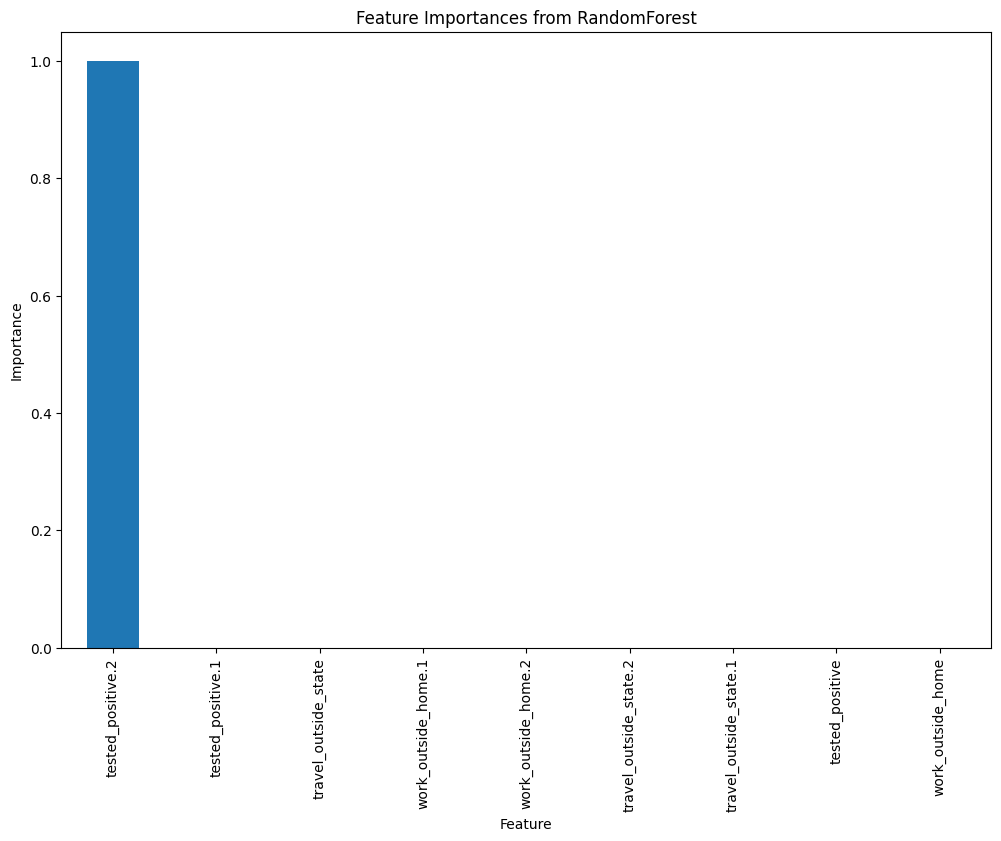

Permutation Importances:
                  Feature  Permutation Importance
2       tested_positive.2               10.817716
1       tested_positive.1                0.009003
6     work_outside_home.1                0.006918
3    travel_outside_state                0.003878
8     work_outside_home.2                0.001619
4       work_outside_home                0.001442
7  travel_outside_state.2                0.001356
5  travel_outside_state.1                0.001040
0         tested_positive                0.000407


<Figure size 1200x800 with 0 Axes>

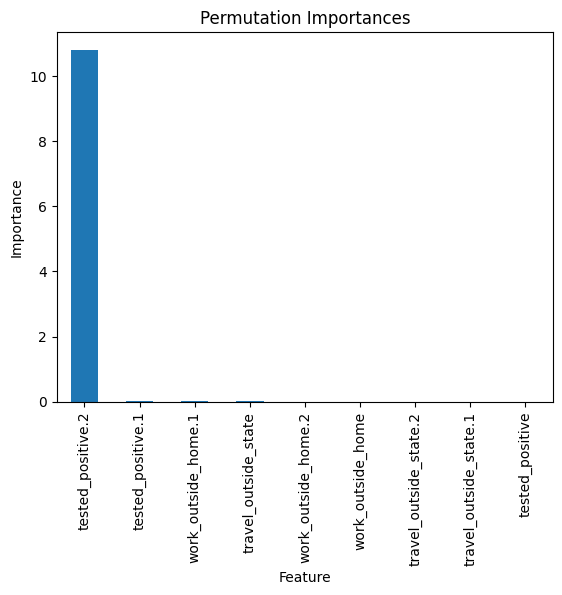

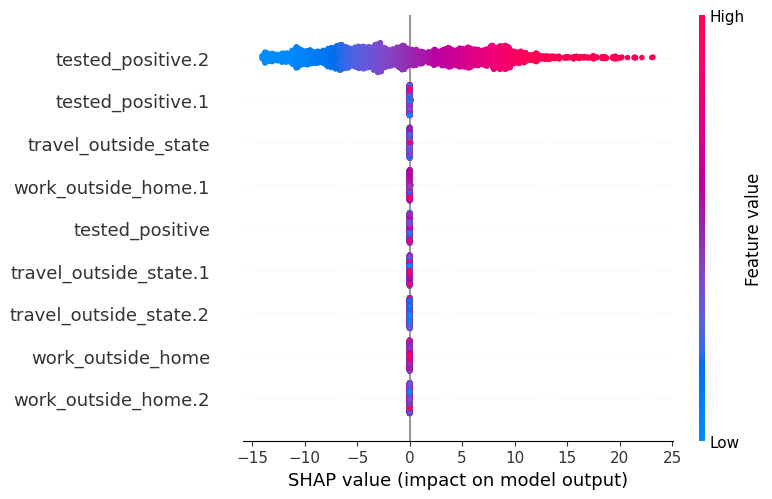

In [23]:
# this code helpmed to relaize the importance of features as ive done earlier but still not able to find relvant one so i used RandomForest: for my reference.




import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# Load data
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1', 'tested_positive.2',
             'travel_outside_state', 'work_outside_home',
             'travel_outside_state.1', 'work_outside_home.1',
             'travel_outside_state.2', 'work_outside_home.2']
target = 'tested_positive.2'

# Extract training features and target
x_train = train_data[features].values
y_train = train_data[target].values

# Extract features from test data for prediction
x_test = test_data[features].values

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Split data into training and validation sets
dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# version 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

# Convert tensors back to DataFrame for feature importance calculation
df = pd.DataFrame(x_train, columns=features)

# Train a RandomForest model for feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Feature importances from RandomForest
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=features).sort_values(ascending=False)

print("Feature Importances from RandomForest:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from RandomForest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Permutation importance
results = permutation_importance(rf_model, x_train, y_train, scoring='neg_root_mean_squared_error')
permutation_importances = results.importances_mean

# Create a DataFrame for permutation importances
perm_importances_df = pd.DataFrame({
    'Feature': features,
    'Permutation Importance': permutation_importances
}).sort_values(by='Permutation Importance', ascending=False)

print("Permutation Importances:")
print(perm_importances_df)

# Plot permutation importances
plt.figure(figsize=(12, 8))
perm_importances_df.plot(kind='bar', x='Feature', y='Permutation Importance', legend=False)
plt.title('Permutation Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# SHAP values
# Train a model again for SHAP values
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Create a SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

# Plot SHAP values
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, x_train, feature_names=features)



In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Load data
train_data = pd.read_csv('covid.train.csv')
test_data = pd.read_csv('covid.test.csv')

# Define features and target
features = [
    'tested_positive', 'tested_positive.1', 'tested_positive.2',
    'worried_become_ill', 'worried_become_ill.1', 'worried_become_ill.2',
    'shop', 'restaurant', 'shop.1', 'restaurant.1',
    'shop.2', 'restaurant.2',
    'travel_outside_state', 'work_outside_home',
    'travel_outside_state.1', 'work_outside_home.1',
    'travel_outside_state.2', 'work_outside_home.2'
]
target = 'tested_positive.2'

# Fill missing values
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

# Extract features and target
x_train = train_data[features].values
y_train = train_data[target].values
x_test = test_data[features].values

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Polynomial features (interaction terms and higher degree features)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train)

# Compute feature importance using RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train_poly, y_train)
importances = rf.feature_importances_

# Feature names for the polynomial features
feature_names = poly.get_feature_names_out(input_features=features)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances from RandomForest:")
print(importance_df)

# Permutation importance using training data
result = permutation_importance(rf, x_train_poly, y_train, n_repeats=10, random_state=0)
importance_df_perm = pd.DataFrame({
    'Feature': feature_names,
    'Permutation Importance': result.importances_mean
}).sort_values(by='Permutation Importance', ascending=False)

print("\nPermutation Importances:")
print(importance_df_perm)


Feature Importances from RandomForest:
                                        Feature    Importance
2                             tested_positive.2  9.994576e-01
35          tested_positive.1 tested_positive.2  4.118380e-04
19            tested_positive tested_positive.2  1.521161e-05
25                       tested_positive shop.1  7.076676e-06
60       tested_positive.2 travel_outside_state  6.748698e-06
..                                          ...           ...
7                                    restaurant  9.888991e-08
167  travel_outside_state.1 work_outside_home.2  9.507643e-08
64     tested_positive.2 travel_outside_state.2  8.913460e-08
23                         tested_positive shop  8.879918e-08
86            worried_become_ill.1 restaurant.2  7.810928e-08

[171 rows x 2 columns]

Permutation Importances:
                                           Feature  Permutation Importance
2                                tested_positive.2            2.011257e+00
35             te

In [79]:
# this code is for all the features values scores (ignore this)
import pandas as pd


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

print("\nPermutation Importances:")
print(importance_df_perm)

In [40]:
import pandas as pd


test_data = pd.read_csv('covid.train.csv')


target = test_data['tested_positive.2']

# Printing  descriptive statistics for the target column
print(target.describe())


count    2700.000000
mean       16.431280
std         7.619354
min         2.338708
25%        10.327314
50%        15.646480
75%        22.535165
max        40.959495
Name: tested_positive.2, dtype: float64


In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
train_data = pd.read_csv('covid.train.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1']  # Day 1 and Day 2 data
target = 'tested_positive.2'  # Day 3 target

# Prepare input and output variables
x_train = train_data[features].values
y_train = train_data[target].values

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Split data into training and validation sets
dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define the improved DNN model
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

        self.dropout = nn.Dropout(p=0.3)  # Dropout for regularization
        self.activation = nn.LeakyReLU()  # Using LeakyReLU for better gradient flow

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.activation(self.layer3(x))
        x = self.dropout(x)
        x = self.activation(self.layer4(x))
        x = self.output(x)
        return x

# Initialize the model
model = ImprovedModel()

# Define the criterion and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.05)  # Adjusted learning rate and L2 regularization

# Training loop
num_epochs = 100  # Increased epochs for extended training
best_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Validation Loss after Epoch {epoch + 1}: {val_loss:.4f}")



# After full training, load the best model if saved
model.load_state_dict(torch.load('best_model.pth'))

# Evaluate on test set - this part can be included later after model training
with torch.no_grad():
    test_predictions = model(x_train_tensor).numpy()
    test_rmse = np.sqrt(mean_squared_error(y_train_tensor.numpy(), test_predictions))
    print(f'Test RMSE: {test_rmse:.4f}')


Epoch [1/100], Loss: 100.8726
Validation Loss after Epoch 1: 2.8229
Epoch [2/100], Loss: 9.5454
Validation Loss after Epoch 2: 1.3206
Epoch [3/100], Loss: 8.8046
Validation Loss after Epoch 3: 1.1074
Epoch [4/100], Loss: 8.0049
Validation Loss after Epoch 4: 1.2138
Epoch [5/100], Loss: 7.8379
Validation Loss after Epoch 5: 1.3640
Epoch [6/100], Loss: 7.6331
Validation Loss after Epoch 6: 1.5161
Epoch [7/100], Loss: 7.7515
Validation Loss after Epoch 7: 1.0685
Epoch [8/100], Loss: 7.7430
Validation Loss after Epoch 8: 1.2229
Epoch [9/100], Loss: 7.2705
Validation Loss after Epoch 9: 1.0861
Epoch [10/100], Loss: 7.3880
Validation Loss after Epoch 10: 1.4367
Epoch [11/100], Loss: 6.5367
Validation Loss after Epoch 11: 1.1172
Epoch [12/100], Loss: 7.2610
Validation Loss after Epoch 12: 1.2733
Epoch [13/100], Loss: 7.1445
Validation Loss after Epoch 13: 1.1702
Epoch [14/100], Loss: 6.8238
Validation Loss after Epoch 14: 1.1931
Epoch [15/100], Loss: 7.0167
Validation Loss after Epoch 15: 1.1

<ipython-input-55-26dab2dce897>:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


In [56]:
#testing

import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
train_data = pd.read_csv('covid.train.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1']  # Day 1 and Day 2 data
target = 'tested_positive.2'  # Day 3 target

# Prepare input and output variables
x_train = train_data[features].values
y_train = train_data[target].values

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Split data into training and validation sets
dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define the improved DNN model
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

        self.dropout = nn.Dropout(p=0.3)  # Dropout for regularization
        self.activation = nn.LeakyReLU()  # Using LeakyReLU for better gradient flow

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.activation(self.layer3(x))
        x = self.dropout(x)
        x = self.activation(self.layer4(x))
        x = self.output(x)
        return x

# Initialize the model
model = ImprovedModel()

# Define the criterion and optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.AdamW(model.parameters(), lr=0.0003, weight_decay=0.1)  # Adjusted learning rate and L2 regularization

# Training loop
num_epochs = 100  # Increased epochs for extended training
best_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Validation Loss after Epoch {epoch + 1}: {val_loss:.4f}")

# Evaluate on train set - this part can be included later after model training
with torch.no_grad():
    test_predictions = model(x_train_tensor).numpy()
    test_rmse = np.sqrt(mean_squared_error(y_train_tensor.numpy(), test_predictions))
    print(f'Test RMSE: {test_rmse:.4f}')


Epoch [1/100], Loss: 180.0240
Validation Loss after Epoch 1: 13.7619
Epoch [2/100], Loss: 14.3738
Validation Loss after Epoch 2: 2.9115
Epoch [3/100], Loss: 10.5594
Validation Loss after Epoch 3: 2.8692
Epoch [4/100], Loss: 9.4540
Validation Loss after Epoch 4: 1.7191
Epoch [5/100], Loss: 9.5584
Validation Loss after Epoch 5: 1.9943
Epoch [6/100], Loss: 8.7198
Validation Loss after Epoch 6: 1.4086
Epoch [7/100], Loss: 8.4970
Validation Loss after Epoch 7: 1.8191
Epoch [8/100], Loss: 8.3839
Validation Loss after Epoch 8: 1.4652
Epoch [9/100], Loss: 8.3251
Validation Loss after Epoch 9: 1.4503
Epoch [10/100], Loss: 8.2494
Validation Loss after Epoch 10: 1.5220
Epoch [11/100], Loss: 8.2674
Validation Loss after Epoch 11: 2.2892
Epoch [12/100], Loss: 7.3462
Validation Loss after Epoch 12: 1.2396
Epoch [13/100], Loss: 7.8539
Validation Loss after Epoch 13: 1.4003
Epoch [14/100], Loss: 7.7572
Validation Loss after Epoch 14: 1.4090
Epoch [15/100], Loss: 7.7248
Validation Loss after Epoch 15: 

final code with Different Learning rates 

In [80]:

# Final code for model training


import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
train_data = pd.read_csv('covid.train.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1']  # Day 1 and Day 2 data
target = 'tested_positive.2'  # Day 3 target

# Prepare input and output variables
x_train = train_data[features].values
y_train = train_data[target].values

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Split data into training and validation sets
dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the improved DNN model
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

        self.dropout = nn.Dropout(p=0.4)
        self.activation = nn.LeakyReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.activation(self.layer3(x))
        x = self.dropout(x)
        x = self.activation(self.layer4(x))
        x = self.output(x)
        return x

# Training function
def train_model(lr, model_name):
    # Initialize the model
    model = ImprovedModel()

    # Define the criterion and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.1)

    # Implement learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)  # Removed 'verbose' parameter

    # Training loop
    num_epochs = 100
    best_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch [{epoch + 1}/{num_epochs}] (LR={lr}), Loss: {epoch_loss:.4f}')

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)

        print(f"Validation Loss after Epoch {epoch + 1} (LR={lr}): {val_loss:.4f}")

        # Learning rate scheduler step
        scheduler.step(val_loss)

        # Save the best model
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), model_name)

    return model

# Train models with different learning rates
model_lr_001 = train_model(lr=0.001, model_name='best_model_lr_001.pth')
model_lr_002 = train_model(lr=0.002, model_name='best_model_lr_002.pth')

# Evaluate the models
def evaluate_model(model_name):
    # Load the model
    model = ImprovedModel()
    model.load_state_dict(torch.load(model_name, weights_only=True))  # Set weights_only=True

    # Evaluate on train set
    model.eval()
    with torch.no_grad():
        test_predictions = model(x_train_tensor).numpy()
        test_rmse = np.sqrt(mean_squared_error(y_train_tensor.numpy(), test_predictions))
        print(f'Test RMSE for {model_name}: {test_rmse:.4f}')

# Evaluate both models
evaluate_model('best_model_lr_001.pth')
evaluate_model('best_model_lr_002.pth')


Epoch [1/100] (LR=0.001), Loss: 128.7807
Validation Loss after Epoch 1 (LR=0.001): 12.9077
Epoch [2/100] (LR=0.001), Loss: 14.8166
Validation Loss after Epoch 2 (LR=0.001): 2.0855
Epoch [3/100] (LR=0.001), Loss: 12.3124
Validation Loss after Epoch 3 (LR=0.001): 1.2340
Epoch [4/100] (LR=0.001), Loss: 11.6025
Validation Loss after Epoch 4 (LR=0.001): 2.8035
Epoch [5/100] (LR=0.001), Loss: 11.6932
Validation Loss after Epoch 5 (LR=0.001): 2.4338
Epoch [6/100] (LR=0.001), Loss: 11.2274
Validation Loss after Epoch 6 (LR=0.001): 1.1092
Epoch [7/100] (LR=0.001), Loss: 11.0274
Validation Loss after Epoch 7 (LR=0.001): 3.1627
Epoch [8/100] (LR=0.001), Loss: 10.0384
Validation Loss after Epoch 8 (LR=0.001): 2.1892
Epoch [9/100] (LR=0.001), Loss: 9.8038
Validation Loss after Epoch 9 (LR=0.001): 1.5150
Epoch [10/100] (LR=0.001), Loss: 10.0735
Validation Loss after Epoch 10 (LR=0.001): 1.4169
Epoch [11/100] (LR=0.001), Loss: 8.8394
Validation Loss after Epoch 11 (LR=0.001): 1.5882
Epoch [12/100] (L

FINAL CODE MODEL AND READY TO DEPLOY 

In [64]:

#Final code and model trained readty to evalute and predict , i ve opted for 0.001 as intially performed well compraed with 0.002
#and 0.002, 0.003 , 0.005 so i have decided 0.001 and saved it as best_model_lr_001



import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import numpy as np

# Load data and help to do the operations
train_data = pd.read_csv('covid.train.csv')

# Extracted  features and target which ive taken earlier
features = ['tested_positive', 'tested_positive.1']  # Day 1 and Day 2 data
target = 'tested_positive.2'  # Day 3 target

# Prepares the  input and output variables
x_train = train_data[features].values
y_train = train_data[target].values

# i've Ensure target values are binary (0 or 1)
y_train = np.clip(y_train, 0, 1)

# Standardize features syntax

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Converting  to PyTorch tensors

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# now im Split data into training and validation sets as practise

dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# i've Defined  the improved DNN model for classification / regression
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

        self.dropout = nn.Dropout(p=0.4)
        self.activation = nn.LeakyReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.activation(self.layer3(x))
        x = self.dropout(x)
        x = self.activation(self.layer4(x))
        x = self.output(x)
        return x  # Output raw , no sigmoid here

# Training function

def train_model(lr, model_name):
    # Initialize the model
    model = ImprovedModel()

    # Define the criterion and optimizer
    criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.1)

    # Implemented learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

    # Training loop
    num_epochs = 100
    best_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch [{epoch + 1}/{num_epochs}] (LR={lr}), Loss: {epoch_loss:.4f}')

        # Validation
        model.eval()
        val_loss = 0.0
        all_targets = []
        all_outputs = []
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
                all_targets.append(targets.numpy())
                all_outputs.append(outputs.numpy())
        val_loss /= len(val_loader.dataset)

        all_targets = np.concatenate(all_targets)
        all_outputs = np.concatenate(all_outputs)

        # Convert logits to probabilities, then to binary predictions
        probs = 1 / (1 + np.exp(-all_outputs))  # Sigmoid activation
        preds = (probs > 0.5).astype(int)

        # Compute metrics
        accuracy = accuracy_score(all_targets, preds)
        precision = precision_score(all_targets, preds)
        recall = recall_score(all_targets, preds)
        f1 = f1_score(all_targets, preds)

        print(f"Validation Loss after Epoch {epoch + 1} (LR={lr}): {val_loss:.4f}")
        print(f"Validation Accuracy: {accuracy:.4f}")
        print(f"Validation Precision: {precision:.4f}")
        print(f"Validation Recall: {recall:.4f}")
        print(f"Validation F1 Score: {f1:.4f}")

        # Learning rate scheduler step
        scheduler.step(val_loss)

        # Save the best model
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), model_name)

    return model

# Train the model with learning rate of 0.001
model_lr_001 = train_model(lr=0.001, model_name='best_model_lr_001.pth')

# Evaluate the model
def evaluate_model(model_name):
    # Load the model
    model = ImprovedModel()
    model.load_state_dict(torch.load(model_name))
    model.eval()

    with torch.no_grad():
        test_predictions = model(x_train_tensor).numpy()
        probs = 1 / (1 + np.exp(-test_predictions))  # Sigmoid activation
        preds = (probs > 0.5).astype(int)  # Convert logits to binary predictions

        test_rmse = np.sqrt(mean_squared_error(y_train_tensor.numpy(), probs))

        accuracy = accuracy_score(y_train_tensor.numpy(), preds)
        precision = precision_score(y_train_tensor.numpy(), preds)
        recall = recall_score(y_train_tensor.numpy(), preds)
        f1 = f1_score(y_train_tensor.numpy(), preds)

        print(f'Test RMSE for {model_name}: {test_rmse:.4f}')
        print(f'Test Accuracy for {model_name}: {accuracy:.4f}')
        print(f'Test Precision for {model_name}: {precision:.4f}')
        print(f'Test Recall for {model_name}: {recall:.4f}')
        print(f'Test F1 Score for {model_name}: {f1:.4f}')

# Evaluate the model
evaluate_model('best_model_lr_001.pth')


Epoch [1/100] (LR=0.001), Loss: 0.1050
Validation Loss after Epoch 1 (LR=0.001): 0.0000
Validation Accuracy: 1.0000
Validation Precision: 1.0000
Validation Recall: 1.0000
Validation F1 Score: 1.0000
Epoch [2/100] (LR=0.001), Loss: 0.0001
Validation Loss after Epoch 2 (LR=0.001): 0.0000
Validation Accuracy: 1.0000
Validation Precision: 1.0000
Validation Recall: 1.0000
Validation F1 Score: 1.0000
Epoch [3/100] (LR=0.001), Loss: 0.0000
Validation Loss after Epoch 3 (LR=0.001): 0.0000
Validation Accuracy: 1.0000
Validation Precision: 1.0000
Validation Recall: 1.0000
Validation F1 Score: 1.0000
Epoch [4/100] (LR=0.001), Loss: 0.0000
Validation Loss after Epoch 4 (LR=0.001): 0.0000
Validation Accuracy: 1.0000
Validation Precision: 1.0000
Validation Recall: 1.0000
Validation F1 Score: 1.0000
Epoch [5/100] (LR=0.001), Loss: 0.0000
Validation Loss after Epoch 5 (LR=0.001): 0.0000
Validation Accuracy: 1.0000
Validation Precision: 1.0000
Validation Recall: 1.0000
Validation F1 Score: 1.0000
Epoch

<ipython-input-64-a92049eadccc>:145: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_name))


In [70]:
from google.colab import files
uploaded = files.upload()

Saving covid.test (1).csv to covid.test (1).csv


In [72]:
 #Load data
train_data = pd.read_csv('covid.test (1).csv')
print(df.columns.tolist())

['tested_positive', 'tested_positive.1', 'tested_positive.2', 'travel_outside_state', 'work_outside_home', 'travel_outside_state.1', 'work_outside_home.1', 'travel_outside_state.2', 'work_outside_home.2']


In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import numpy as np

# Load data
test_data = pd.read_csv('covid.test (1).csv')

# Extract features
features = ['tested_positive', 'tested_positive.1']
x_test = test_data[features].values

# Standardize features using the same scaler as used during training
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

# Convert to PyTorch tensors
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Define the model class
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.layer1 = nn.Linear(x_test_tensor.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

        self.dropout = nn.Dropout(p=0.4)
        self.activation = nn.LeakyReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.activation(self.layer3(x))
        x = self.dropout(x)
        x = self.activation(self.layer4(x))
        x = self.output(x)
        return x  # Output raw logits

# Load the trained model
model = ImprovedModel()
model.load_state_dict(torch.load('best_model_lr_001.pth'))
model.eval()

# Make predictions
with torch.no_grad():
    test_predictions = model(x_test_tensor).numpy()
    preds = test_predictions.flatten()  # Flatten the output to a 1D array

# Add predictions to the DataFrame
test_data['tested_positive.2'] = preds

# Print the first few rows of the DataFrame
print("First few rows of the DataFrame with predictions:")
print(test_data.head())

# Print basic statistics of predictions for verification
print("\nStatistics of predictions:")
print(f"Mean: {np.mean(preds)}")
print(f"Standard Deviation: {np.std(preds)}")

# Save the results to a new CSV file
test_data.to_csv('covid_test_with_predictions.csv', index=False)


<ipython-input-76-58110be8ac0f>:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model_lr_001.pth'))


First few rows of the DataFrame with predictions:
   id   AL   AK   AZ   AR   CA   CO   CT   FL   GA   ID   IL   IN   IA   KS  \
0   0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    KY   LA   MD   MA   MI   MN   MS   MO   NE   NV   NJ   NM   NY   NC   OH  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.

FINAL CODE WITH OUTPUT 

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import numpy as np
from google.colab import files  # Import for downloading files

# Load data
train_data = pd.read_csv('covid.train.csv')

# Extract features and target
features = ['tested_positive', 'tested_positive.1']  # Day 1 and Day 2 data
target = 'tested_positive.2'  # Day 3 target

# Prepare input and output variables
x_train = train_data[features].values
y_train = train_data[target].values

# Ensure target values are binary (0 or 1)
y_train = np.clip(y_train, 0, 1)

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Define the improved DNN model for classification
class ImprovedModel(nn.Module):
    def __init__(self):
        super(ImprovedModel, self).__init__()
        self.layer1 = nn.Linear(x_train_tensor.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

        self.dropout = nn.Dropout(p=0.4)
        self.activation = nn.LeakyReLU()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.dropout(x)
        x = self.activation(self.layer2(x))
        x = self.dropout(x)
        x = self.activation(self.layer3(x))
        x = self.dropout(x)
        x = self.activation(self.layer4(x))
        x = self.output(x)
        return x  # Output raw logits, no sigmoid here

# Load the model
model = ImprovedModel()
model.load_state_dict(torch.load('best_model_lr_001.pth', weights_only=True))
model.eval()

# Load the new data to make predictions
new_data = pd.read_csv('covid.test (1).csv')

# Extract features
x_new = new_data[features].values
x_new = scaler.transform(x_new)  # Standardize features

# Convert to PyTorch tensor
x_new_tensor = torch.tensor(x_new, dtype=torch.float32)

# Make predictions
with torch.no_grad():
    predictions = model(x_new_tensor).numpy()
    predictions = predictions.flatten()  # Flatten to 1D array

# Create a DataFrame with predictions
new_data['tested_positive.2'] = predictions

# Save the DataFrame to a CSV file
output_file = '/content/predictions.csv'
new_data.to_csv(output_file, index=False)

# Print the path of the saved file and some sample predictions
print(f'Predictions saved to {output_file}')
print(new_data[['tested_positive.2']].head())

# Download the file to local machine
files.download(output_file)


Predictions saved to /content/predictions.csv
   tested_positive.2
0          20.579092
1           2.796142
2           2.892820
3          11.430788
4           3.076985


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DATA VISUALIZATION

In [2]:
import pandas as pd
import numpy as np

# Assuming 'test_data' contains your data with columns as state codes and 'tested_positive.2' values
# Load the data
test_data = pd.read_csv('predictions.csv')

# List of state columns (make sure these are correct and match  data)
state_columns = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 
                 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 
                 'OR', 'PA', 'RI', 'SC', 'TX', 'UT', 'VA', 'WA', 'WV', 'WI']

# Calculate the weighted average of 'tested_positive.2' for each state
state_percentages = {}

for state in state_columns:
    # Calculate the weighted average of the 'tested_positive.2' for each state
    state_percentages[state] = (test_data[state] * test_data['tested_positive.2']).sum() / test_data[state].sum()

# Convert to DataFrame for easy manipulation
state_percentages_df = pd.DataFrame(list(state_percentages.items()), columns=['State', 'AverageTestedPositive2'])

# Sort by highest average percentage and get the top 10
top_10_states = state_percentages_df.sort_values(by='AverageTestedPositive2', ascending=False).head(10)

print("Top 10 States with Highest Predicted Percentages:")
print(top_10_states)

# If you want to save it to a CSV file
top_10_states.to_csv('top_10_states.csv', index=False)


Top 10 States with Highest Predicted Percentages:
   State  AverageTestedPositive2
0     AL               29.510442
9     ID               28.180877
13    KS               25.263603
3     AR               23.891952
15    LA               23.621837
12    IA               22.847571
8     GA               22.841201
11    IN               22.348680
2     AZ               21.230840
22    NE               21.212175


Top 10 States with Highest Predicted Percentages:
   State  AverageTestedPositive2
0     AL               29.510442
9     ID               28.180877
13    KS               25.263603
3     AR               23.891952
15    LA               23.621837
12    IA               22.847571
8     GA               22.841201
11    IN               22.348680
2     AZ               21.230840
22    NE               21.212175


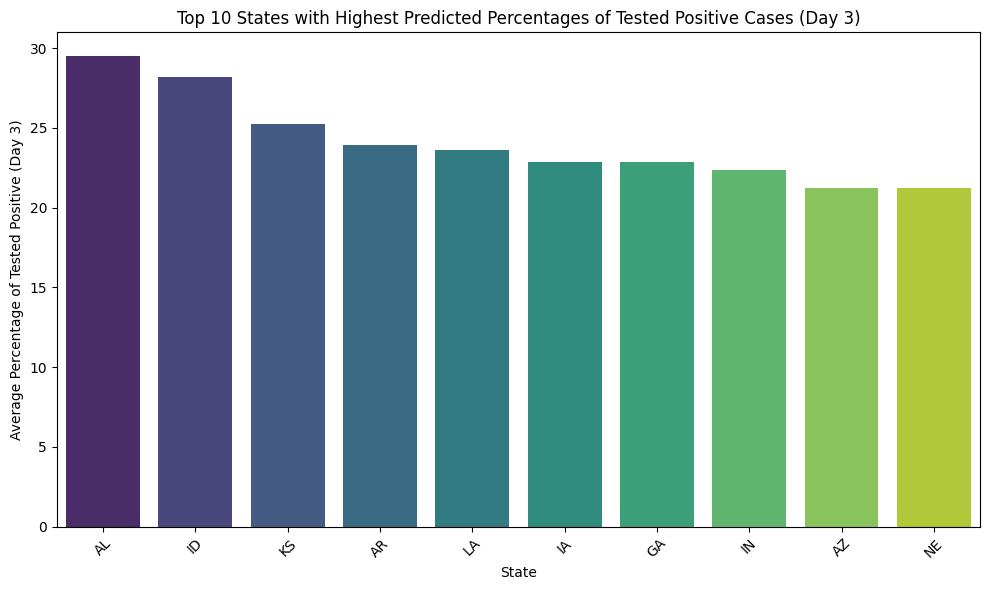

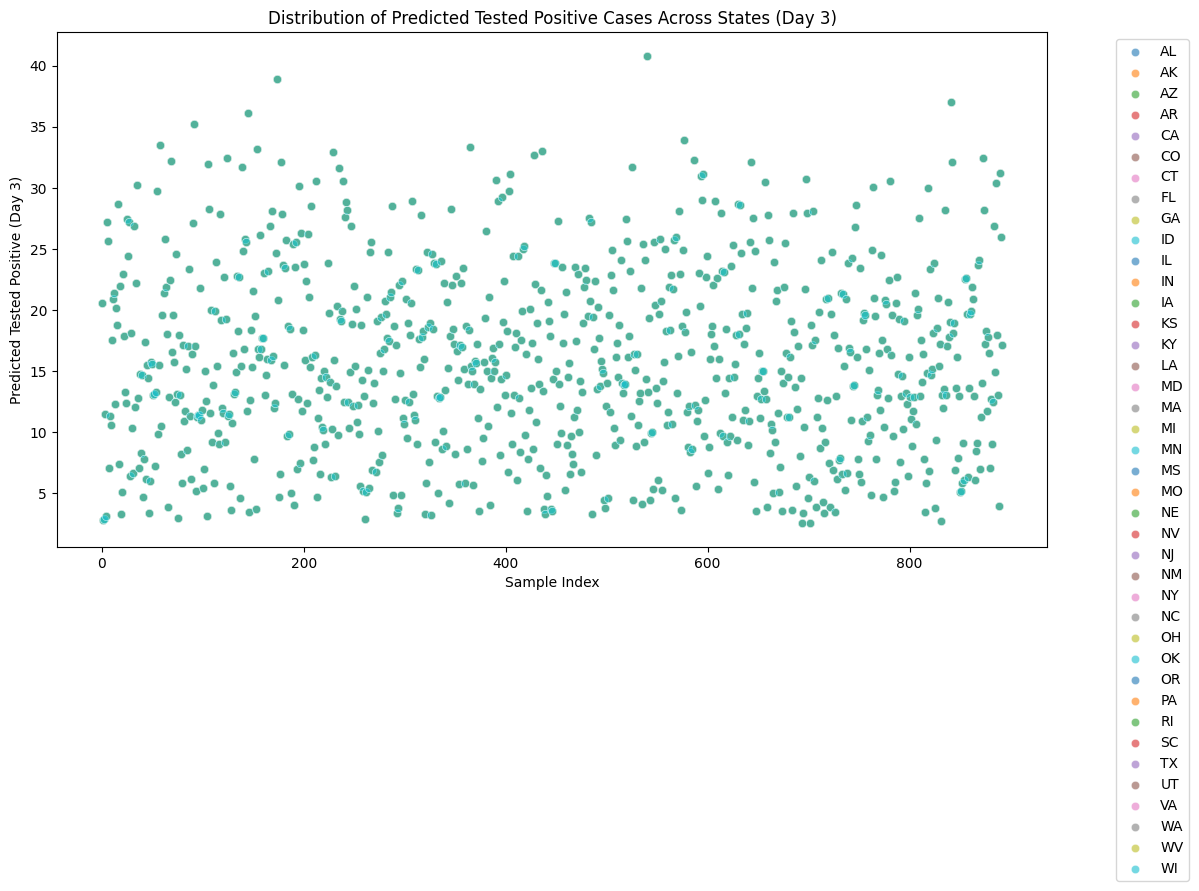

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'test_data' contains your data with columns as state codes and 'tested_positive.2' values
# Load the data
test_data = pd.read_csv('predictions.csv')

# List of state columns (make sure these are correct and match data)
state_columns = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 
                 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 
                 'OR', 'PA', 'RI', 'SC', 'TX', 'UT', 'VA', 'WA', 'WV', 'WI']

# Calculate the weighted average of 'tested_positive.2' for each state
state_percentages = {}

for state in state_columns:
    # Calculate the weighted average of the 'tested_positive.2' for each state
    state_percentages[state] = (test_data[state] * test_data['tested_positive.2']).sum() / test_data[state].sum()

# Convert to DataFrame for easy manipulation
state_percentages_df = pd.DataFrame(list(state_percentages.items()), columns=['State', 'AverageTestedPositive2'])

# Sort by highest average percentage and get the top 10
top_10_states = state_percentages_df.sort_values(by='AverageTestedPositive2', ascending=False).head(10)

print("Top 10 States with Highest Predicted Percentages:")
print(top_10_states)

# Visualization 1: Bar Chart for Top 10 States
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states, x='State', y='AverageTestedPositive2', hue='State', palette='viridis', dodge=False)
plt.title('Top 10 States with Highest Predicted Percentages of Tested Positive Cases (Day 3)')
plt.xlabel('State')
plt.ylabel('Average Percentage of Tested Positive (Day 3)')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False) 
plt.tight_layout()
plt.show()

# Visualization 2: Scatter Plot for Distribution of Predictions
plt.figure(figsize=(12, 8))
for state in state_columns:
    sns.scatterplot(data=test_data, x=test_data.index, y='tested_positive.2', label=state, alpha=0.6)

plt.title('Distribution of Predicted Tested Positive Cases Across States (Day 3)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Tested Positive (Day 3)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Save the top 10 states to a CSV file if needed
top_10_states.to_csv('top_10_states.csv', index=False)


Top 5 Safest States with Lowest Predicted Percentages:
   State  AverageTestedPositive2
26    NY                3.853540
30    OR                5.193152
37    WA                5.628211
32    RI                6.511819
24    NJ                6.531618

Additional Metrics:
Median: 15.1472
Variance: 56.0444
Standard Deviation: 7.4863
25th Percentile (Q1): 10.2292
75th Percentile (Q3): 20.9084


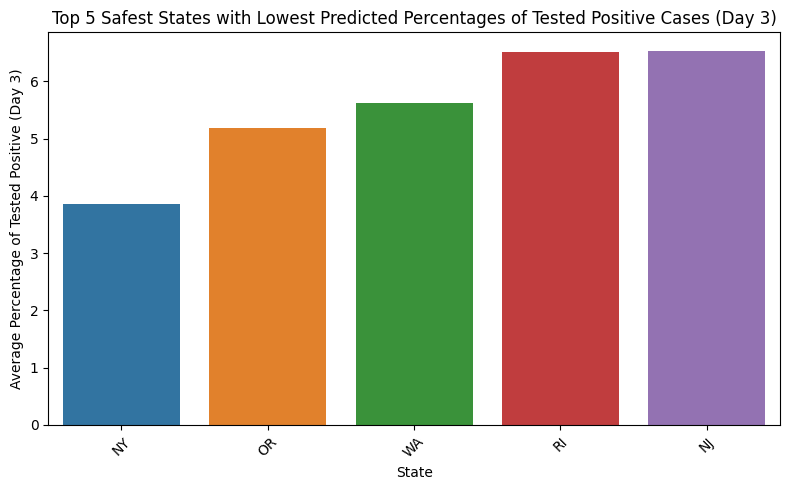

/var/folders/bp/brqc8c_n71ddmt7rb4pbwb340000gn/T/ipykernel_19398/465425688.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=test_data, y='tested_positive.2', palette='Set2')


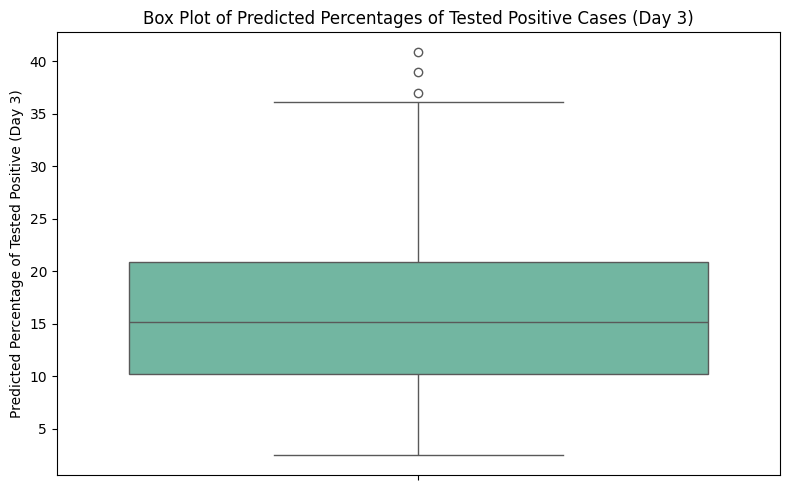

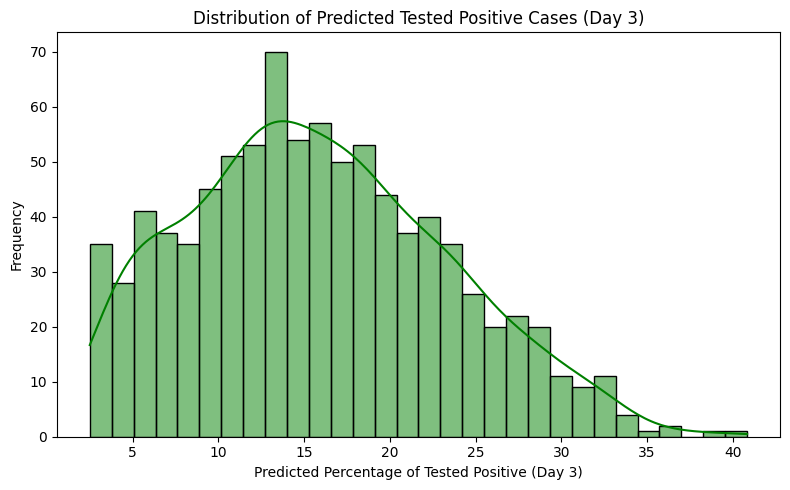

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the test data with predictions
test_data = pd.read_csv('predictions.csv')

# List of state columns
state_columns = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 
                 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OK', 
                 'OR', 'PA', 'RI', 'SC', 'TX', 'UT', 'VA', 'WA', 'WV', 'WI']

# Calculate weighted average of 'tested_positive.2' for each state
state_percentages = {}

for state in state_columns:
    state_percentages[state] = (test_data[state] * test_data['tested_positive.2']).sum() / test_data[state].sum()

# Convert to DataFrame
state_percentages_df = pd.DataFrame(list(state_percentages.items()), columns=['State', 'AverageTestedPositive2'])

# Top 5 Safest States (with lowest predicted percentages)
top_5_safest_states = state_percentages_df.sort_values(by='AverageTestedPositive2', ascending=True).head(5)

# Display Top 5 Safest States
print("Top 5 Safest States with Lowest Predicted Percentages:")
print(top_5_safest_states)

# Additional Metrics
median_value = np.median(test_data['tested_positive.2'])
variance_value = np.var(test_data['tested_positive.2'])
std_deviation_value = np.std(test_data['tested_positive.2'])
q1_value = np.percentile(test_data['tested_positive.2'], 25)
q3_value = np.percentile(test_data['tested_positive.2'], 75)

print("\nAdditional Metrics:")
print(f"Median: {median_value:.4f}")
print(f"Variance: {variance_value:.4f}")
print(f"Standard Deviation: {std_deviation_value:.4f}")
print(f"25th Percentile (Q1): {q1_value:.4f}")
print(f"75th Percentile (Q3): {q3_value:.4f}")

# Visualization 1: Bar Plot for Top 5 Safest States
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_safest_states, x='State', y='AverageTestedPositive2', hue='State', dodge=False, legend=False)
plt.title('Top 5 Safest States with Lowest Predicted Percentages of Tested Positive Cases (Day 3)')
plt.xlabel('State')
plt.ylabel('Average Percentage of Tested Positive (Day 3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualization 2: Box Plot of Predicted Percentages
plt.figure(figsize=(8, 5))
sns.boxplot(data=test_data, y='tested_positive.2', palette='Set2')
plt.title('Box Plot of Predicted Percentages of Tested Positive Cases (Day 3)')
plt.ylabel('Predicted Percentage of Tested Positive (Day 3)')
plt.tight_layout()
plt.show()

# Visualization 3: Distribution Plot of Predictions
plt.figure(figsize=(8, 5))
sns.histplot(test_data['tested_positive.2'], bins=30, kde=True, color='green')
plt.title('Distribution of Predicted Tested Positive Cases (Day 3)')
plt.xlabel('Predicted Percentage of Tested Positive (Day 3)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Save the top 5 safest states to a CSV file if needed
top_5_safest_states.to_csv('top_5_safest_states.csv', index=False)


In [15]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 892.1 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 700.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 569.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 681.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 913.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 1.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 1.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
